## Core Algorithms
## Date: 9/2/22

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from six.moves import urlib

import tensorflow.compat.v2.feature_column as fc

### Linear regression

Use the titanic dataset

In [2]:
#import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [3]:
#remove target variable from training data
y_train = train.pop('Survived')
print(y_train)

### EDA

In [9]:
train.head()
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

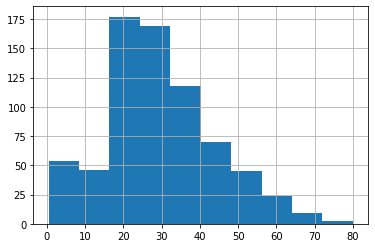

In [14]:
train.Age.hist()

<AxesSubplot:>

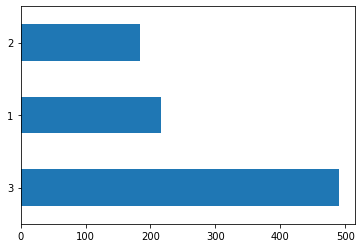

In [19]:
train.Pclass.value_counts().plot(kind='barh')

<AxesSubplot:>

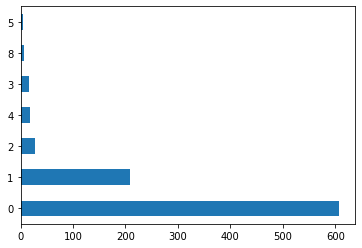

In [20]:
train.SibSp.value_counts().plot(kind='barh')

<AxesSubplot:>

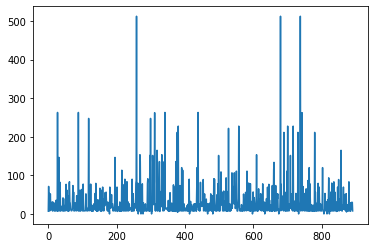

In [25]:
train.Fare.plot()

<AxesSubplot:>

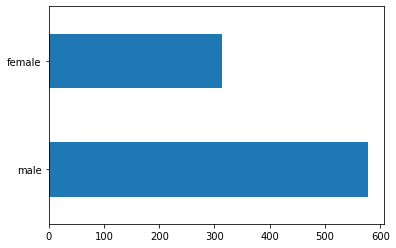

In [27]:
train.Sex.value_counts().plot(kind='barh')

<AxesSubplot:>

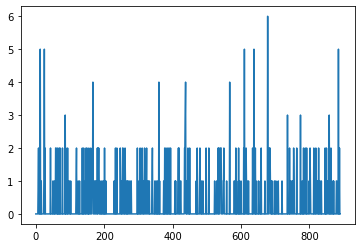

In [24]:
train.Parch.plot()